## <b><i> Context 
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### <b><i><u> Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings (action= 'ignore')
plt.style.use(['seaborn-bright' , 'dark_background'])

### <b><u><i> Importing the dataset

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### <b><u><i> Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.shape

(5110, 12)

### <b><u><i> Treating Missing Values

In [5]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* Only Body Mass Index (bmi) has missing values

In [6]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(missing_values= np.nan , strategy= 'median')

Columns = ['bmi']
data[Columns] = SI.fit_transform(data[Columns])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

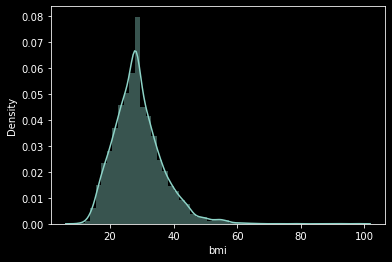

In [7]:
sns.distplot(data['bmi'])

<AxesSubplot:xlabel='bmi'>

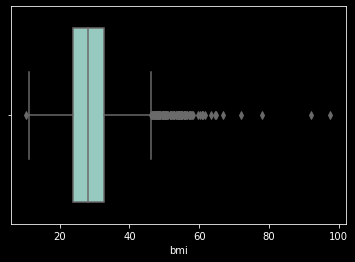

In [8]:
sns.boxplot(data["bmi"])

### <b><u><i> Treating Outliers for bmi

In [9]:
data['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [10]:
q1 = data["bmi"].quantile(0.25)
q3 = data['bmi'].quantile(0.75)

iqr = q3 - q1
print(iqr)

8.999999999999996


In [11]:
upper_limit = q3 + 1.5*(iqr)
lower_limit = q1 - 1.5*(iqr)

upper_limit , lower_limit

(46.29999999999999, 10.300000000000006)

In [12]:
def Limit_imputer(value) :
    if value > upper_limit :
        return upper_limit
    if value < lower_limit :
        return lower_limit 
    else :
        return value

data['bmi'] = data['bmi'].apply(Limit_imputer)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

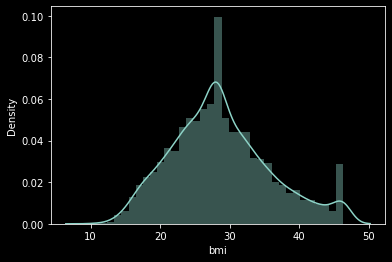

In [13]:
sns.distplot(data['bmi'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

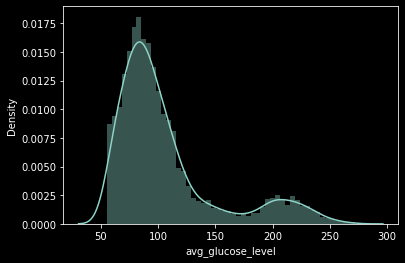

In [14]:
sns.distplot(data['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level'>

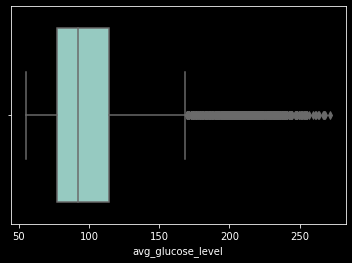

In [15]:
sns.boxplot(data['avg_glucose_level'])

### <b><i><u> Treating Outliers avg_glucose_level

In [16]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [17]:
q1 = data["avg_glucose_level"].quantile(0.25)
q3 = data['avg_glucose_level'].quantile(0.75)

iqr = q3 - q1
print(iqr)

36.845


In [18]:
upper_limit = q3 + 2*(iqr)
lower_limit = q1 - 2*(iqr)

upper_limit , lower_limit

(187.78, 3.555000000000007)

In [19]:
def Limit_imputer(value) :
    if value > upper_limit :
        return upper_limit
    if value < lower_limit :
        return lower_limit 
    else :
        return value

data['avg_glucose_level'] = data['avg_glucose_level'].apply(Limit_imputer)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

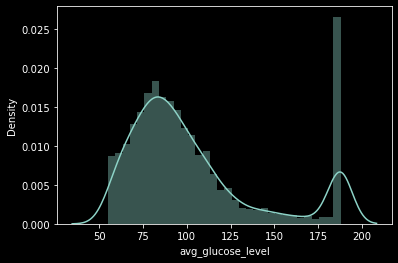

In [20]:
sns.distplot(data['avg_glucose_level'])

<AxesSubplot:xlabel='gender', ylabel='count'>

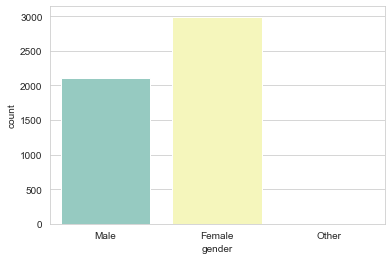

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=data)

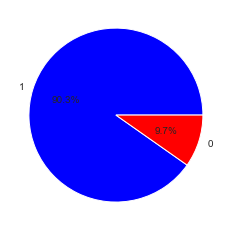

In [22]:
colors = ['blue' , 'red'] 
plt.pie(data['hypertension'].value_counts() , colors= colors,
       wedgeprops={"edgecolor": "white"} , autopct= '%1.1f%%', labels=['1' , '0'])
plt.show()

* About 90.3 % of all the genders are 'MEN', remaining 9.7 % are 'WOMEN'


<AxesSubplot:xlabel='age', ylabel='Density'>

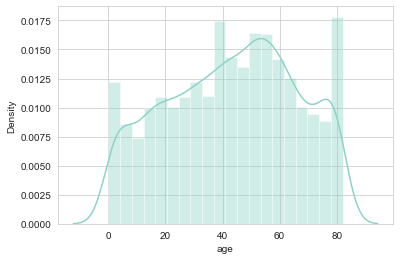

In [23]:
sns.distplot(data['age'])

In [24]:
data = data.drop(columns = 'id' , axis = 1)

In [25]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,187.78,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,187.78,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### <b><u> Label Encoding 

In [26]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,187.78,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,187.78,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
categ = ['gender' , 'ever_married' , 'work_type' , 'Residence_type' , 'smoking_status']

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [29]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,187.78,36.6,1,1
1,0,61.0,0,0,1,3,0,187.78,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


### Separating the dataset

In [30]:
X = data.iloc[: , :-1].values
Y = data.iloc[ : , -1].values

### Splitting the dataset

In [31]:
from sklearn.model_selection import train_test_split as tts
x_train , x_test , y_train , y_test = tts(X , Y , test_size= 0.25)

#### <b><u> Let's see the distribution of the Dependent variable (STROKE)

In [32]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

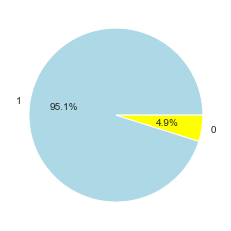

In [33]:
colors = ['lightblue' , 'yellow'] 
plt.pie(data['stroke'].value_counts() , colors= colors,
       wedgeprops={"edgecolor": "white"} , autopct= '%1.1f%%', labels=['1' , '0'])
plt.show()

* STROKE variable is very imbalanced

* Let's us SMOTE technique to balance this imbalanced variable

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [35]:
x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train)

In [36]:
from collections import Counter
print('Before SMOTE : ',Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({0: 3660, 1: 172})
After SMOTE :  Counter({1: 3660, 0: 3660})


### Applying Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_smote , y_train_smote)

RandomForestClassifier()

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix , accuracy_score
C_M = confusion_matrix(y_test , y_pred)
print(C_M)
accuracy_score(y_test , y_pred)


[[1194    7]
 [  75    2]]


0.9358372456964006

### <b><i> Accuracy Rates

1. Logistic Regression : 76.60 %
2. KNN : 80.90 %
3. SVM : 74.25 %
4. Kernel SVM : 74.41 %
5. Naive Bayes : 74.72 % 
6. Decision Tree : 90.84 %
7. Random Forest : 93.58 % 
8. XGBOOST : 94.44 % 
9. CATBOOST : 94.52 % 

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1201
           1       0.22      0.03      0.05        77

    accuracy                           0.94      1278
   macro avg       0.58      0.51      0.51      1278
weighted avg       0.90      0.94      0.91      1278



### K-Fold Cross Validation 

In [41]:
from sklearn.model_selection import cross_val_score
Accuraries = cross_val_score(estimator = classifier , X = x_train_smote , y = y_train_smote , cv = 10)
print("Accuracies : {:.2f} %".format(Accuraries.mean()*100))
print("Standard Deviation : {:.2f} %".format(Accuraries.std()*100))

Accuracies : 97.42 %
Standard Deviation : 6.30 %


### Randomized Grid Search CV

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(200 , 2000 , 10)]
# Number of features to consider at every split 
max_features = ['auto' , 'sqrt' , 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10 , 1000 , 10)]
# Maximum number of samples required to split a node
min_samples_split = [2 , 5, 10 , 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6 , 8]
# Create the Random Grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : ['entropy' , 'gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator= classifier , param_distributions= random_grid , n_iter = 10 , cv = 2 , verbose = True , n_jobs = -1) 
random_search.fit(x_train_smote , y_train_smote)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=True)

In [45]:
random_search.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'entropy'}

In [46]:
random_search.best_score_

0.9657103825136613

### AUC ROC Curve

In [49]:
y_pred_proba = classifier.predict_proba(x_test)

In [50]:
from sklearn.metrics import roc_curve , roc_auc_score 
fpr ,tpr , threshold = roc_curve(y_test , y_pred_proba[:,1])

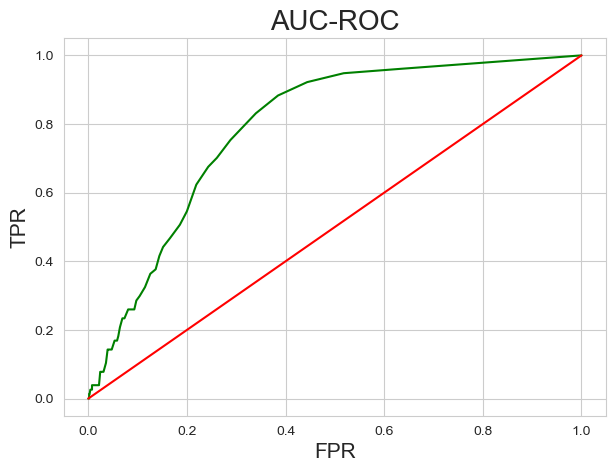

0.7880229678730928

In [51]:
plt.figure(figsize = (7,5) , dpi = 100)
plt.plot(fpr , tpr , color = 'green')
plt.plot([0,1] , [0,1] , label = 'baseline' , color = 'red')
plt.xlabel('FPR' , fontsize = 15)
plt.ylabel('TPR' , fontsize = 15)
plt.title('AUC-ROC' , fontsize = 20)
plt.show()
roc_auc_score(y_test , y_pred_proba[:,1])